# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [16]:
import numpy as np
import math

def altitude(T):
    #code here
    G = 6.67 * 10**-11 #m^3 kg^-1 s^-2
    M = 5.97 * 10**24 #kg
    R = 6371 * 1000 #km to meters
    h = (((G * M * T**2)/(4 * math.pi**2))** (1/3)) -R
    return h
T = 3
print ('The altitude of the satelitde is', altitude(T))

The altitude of the satelitde is -6326057.111709947


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [17]:
geosync = 24*60*60
hourhalf = 90*60
min45 = 45*60

print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 279321.62537285965 ;  45 min: Altitude = -2181559.8978108233


The negative result for the 45 minute altitude suggests that the required altitude for a satleite to be able to make a full orbit around the earth in 45 minutes would mean that the satelite would have to be located inside the earths surface and not in the atmosphere, making this an impossible time for the satelite.

Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [20]:
persidereal = 23.93 * 60*60
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(persidereal))

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 35773762.329895645


A full roration of the earth is not a perfect 24 hours like how we set our clocks. The true orbit is 23.93 but we round up for the sake of simplicity, and every 4 years we have a leap year that accounts for this inaccuracy. Satelites follow the true rotation unlike clocks on earth. The difference will be...

In [24]:
print('the difference between geosync and persideal is', geosync - persidereal, 'seconds')

the difference between geosync and persideal is 252.0 seconds


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heights with times less than geosynchronous in blue and those longer in green.

[-3173858.83113331 -1295854.74525018]
[-3173858.83113331 -1295854.74525018   279321.62537286  1685290.91628129
  2977497.48933682  4185727.54404374  5328316.9349834   6417564.67546676
  7462226.43103033  8468814.74889534  9442339.78962501 10386760.40875671
 11305273.57020599 12200508.00990202 13074658.39741086 13929581.0189993
 14766863.72842192 15587878.18873185 16393819.62060015 17185737.54340966
 17964559.89721615 18731112.21718133 19486133.05330898 20230286.50149144
 20964172.4844593  21688335.26022267 22403270.51980022 23109431.35155431
 23807233.28700365 24497058.59626425 25179259.96592242 25854163.66512514
 26522072.28482199 27183267.11885741 27838010.24286564 28486546.33683448
 29129104.28916551 29765898.61360699 30397130.70522541 31022989.95734728
 31643654.75794239 32259293.38107605 32870064.78670946 33476119.34017744
 34077599.46104775 34674640.20970437 35267369.81885241]
[3.64403773e+07 3.70208816e+07 3.75975284e+07 ... 4.00758893e+08
 4.00947751e+08 4.01136565e+08]


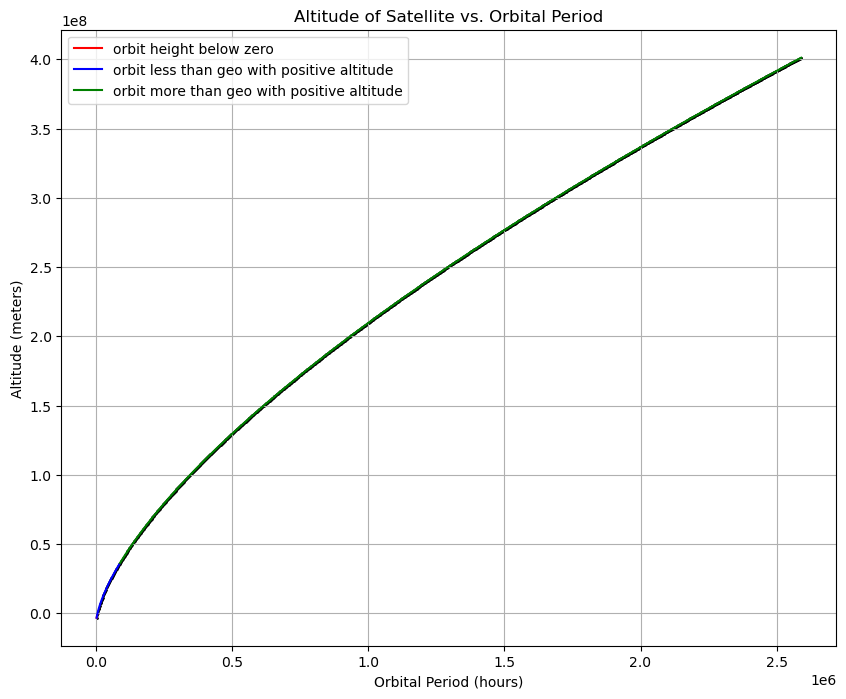

In [46]:
#standard importing
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt

#recall funtion
import math

def altitude(T):
    #code here
    G = 6.67 * 10**-11 #m^3 kg^-1 s^-2
    M = 5.97 * 10**24 #kg
    R = 6371 * 1000 #km to meters
    h = (((G * M * T**2)/(4 * math.pi**2))** (1/3)) -R
    return h
    
#create steps
#store data points
x= 0.5 * 60*60
y= 30 *24*60*60
z= 0.5 *60*60
times= np.arange(x, y, z)
height= altitude(times)

#plot data
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(times, height ,s=1,c='black') #points are so close together that it looks like a line already

#Plot orbits with height below 0 as red, and plots positive heights with times less than geosynchronous in blue and those longer in green.
geosync = 24 *60*60
# persideal = 23.93 *60*60
height_below_0 = height < 0
height_less_geo = height < altitude(geosync)
height_more_geo = height > altitude(geosync)
print(height[height_below_0]) #passing it through the array
print(height[height_less_geo])
print(height[height_more_geo])


plt.plot(times[height_below_0], (height[height_below_0]), 'r',label= 'orbit height below zero')
plt.plot(times[height_less_geo], (height[height_less_geo]), 'b',label= 'orbit less than geo with positive altitude')
plt.plot(times[height_more_geo], (height[height_more_geo]), 'g',label= 'orbit more than geo with positive altitude')

#labels and titles
plt.xlabel("Orbital Period (hours)")
plt.ylabel("Altitude (meters)")
plt.title("Altitude of Satellite vs. Orbital Period")
plt.legend()
plt.grid(True)
plt.show()



### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [26]:
import numpy as np
import math

c = (3 * 10)**8 
def special_relativity(x,v):
    #s = gamma
    s = 1/math.sqrt(1- (v**2 / c**2))
    t = x/v
    #x_prime = s * (x - v*t)
    t_prime = s * (t - ((v*x) / c**2))
    
    return(t, t_prime)
x = 100*(9.461e+15) #light years to meters
v = 0.9*c #speed as a fraction of light
t, t_prime= special_relativity(x,v)
print('The time for an observer on Earth', t,'and for the observer aboard the ship is', t_prime)


The time for an observer on Earth 1602228.6575555895 and for the observer aboard the ship is 698395.2802729651


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [25]:
import numpy as np
import math

c = (3 * 10)**8 
def special_relativity(x,v):
    #s = gamma
    s = 1/math.sqrt(1- (v**2 / c**2))
    t = x/v
    #x_prime = s * (x - v*t)
    t_prime = s * (t - ((v*x) / c**2))
    
    return(t, t_prime)

x = 10*(9.461e+15) #light years to meters
speeds = [0.90 * c, 0.98 * c, 0.999 * c] #speeds as a fraction of light

for v in speeds:
    t, t_prime= special_relativity(x,v)
    print('At', v,'observer on earth time is', t,' and observer aboard ship is', t_prime)
    print('At', v,' observer on earth time is', t,' and observer aboard ship is', t_prime)
    print('At', v,' observer on earth time is', t,' and observer aboard ship is', t_prime)


At 590490000000.0 observer on earth time is 160222.86575555895  and observer aboard ship is 69839.52802729652
At 590490000000.0  observer on earth time is 160222.86575555895  and observer aboard ship is 69839.52802729652
At 590490000000.0  observer on earth time is 160222.86575555895  and observer aboard ship is 69839.52802729652
At 642978000000.0 observer on earth time is 147143.44814286026  and observer aboard ship is 29281.17647093911
At 642978000000.0  observer on earth time is 147143.44814286026  and observer aboard ship is 29281.17647093911
At 642978000000.0  observer on earth time is 147143.44814286026  and observer aboard ship is 29281.17647093911
At 655443900000.0 observer on earth time is 144344.92410410717  and observer aboard ship is 6453.6872229856
At 655443900000.0  observer on earth time is 144344.92410410717  and observer aboard ship is 6453.6872229856
At 655443900000.0  observer on earth time is 144344.92410410717  and observer aboard ship is 6453.6872229856


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [32]:
import math

def quadratic_equation(a, b, c):
    #numerator without +- b
    numerator = b**2 - 4 * a * c
    # Check if the numerator is negative, zero, or positive
    if numerator < 0:
        print("The equation has no real solutions.")
    elif numerator == 0:
        # One real solution
        x = -b / (2 * a)
        print("The equation has one real solution:", x)
    else:
        # Two real solutions
        x1 = (-b + math.sqrt(numerator)) / (2 * a)
        x2 = (-b - math.sqrt(numerator)) / (2 * a)
        print("The equation has two real solutions:", x1, "and", x2)

a = 1
b = 8
c = 4

quadratic_equation(a, b, c)

The equation has two real solutions: -0.5358983848622456 and -7.464101615137754


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

The alternative solutions are much smaller than the answers provide by the original solution, this could be due to when in b is very large, it leads to numerical instability due to subtracting nearly equal numbers.

In [36]:
import math

def quadratic_equation(a, b, c):
    #numerator without +- b
    numerator = b**2 - 4 * a * c
    # Check if the numerator is negative, zero, or positive
    if numerator < 0:
        print("The equation has no real solutions.")
    elif numerator == 0:
        # One real solution
        x = -b / (2 * a)
        print("The equation has one real solution:", x)
    else:
        # Two real solutions
        x1 = (-b + math.sqrt(numerator)) / (2 * a)
        x2 = (-b - math.sqrt(numerator)) / (2 * a)
        print("The equation has two real solutions:", x1, "and", x2)
       
        # Two real solutions using the alternative formula
        x1_alternative = (2 * c) / (-b - math.sqrt(numerator))
        x2_alternative = (2 * c) / (-b + math.sqrt(numerator))
        print("Alternative solutions:", x1_alternative, x2_alternative)

a = 0.001
b = 1000
c = 0.001

quadratic_equation(a, b, c)

The equation has two real solutions: -9.999894245993346e-07 and -999999.999999
Alternative solutions: -1.000000000001e-06 -1000010.5755125057


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__